# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Probability theory
### VIDEO: Sampling variability
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

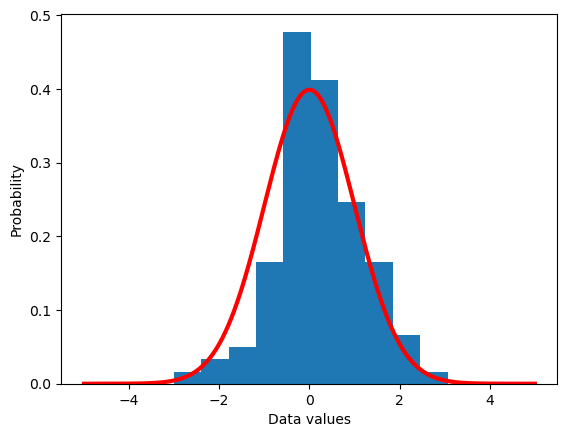

In [14]:
## a "theoretical" normal distribution

x = np.linspace(-5, 5, 10101)
theoNormDist = stats.norm.pdf(x)

# To transform cont. pdf into discrete pmf (lifehack)
# theoNormDist = theoNormDist*np.mean(np.diff(x))

# now for our experiment
numSamples = 100

# initialize
sampledata = np.zeros(numSamples)

# run the experiment!
# Майк сделал такой громоздкий код вместо sampledata = np.random.randn(numSamples)
# чтобы проиллюстрировать, как работает "честный эксперимент":
# делаем один замер, записываем, делаем следующий (который не зависит от предыдущего)
rng = np.random.default_rng()
for expi in range(numSamples):
    sampledata[expi] = rng.standard_normal()

# show the results
plt.hist(sampledata, density=True)
plt.plot(x, theoNormDist, 'r', linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show()

In [15]:
## show the mean of samples of a known distribution

# generate population data with known mean
populationN = 1000000
population = rng.standard_normal(size=populationN)
population = population - np.mean(population) # demean

# now we draw a random sample from that population
samplesize = 30

# the random indices to select from the population
sampleidx = rng.integers(low=0, high=populationN, size=samplesize)
samplemean = np.mean(population[sampleidx])

### how does the sample mean compare to the population mean?
print(f"1 sample mean: {samplemean}")
print(f"True population mean: {np.round(np.mean(population), 2)}")

1 sample mean: 0.2981500009556379
True population mean: -0.0


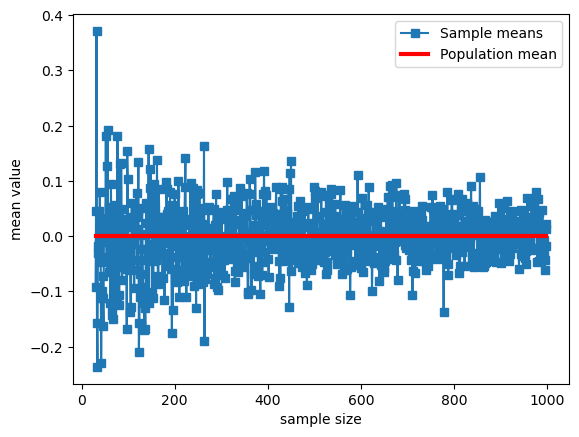

In [13]:
## repeat for different sample sizes

samplesizes = np.arange(30, 1000)
samplemeans = np.zeros(len(samplesizes))

for sampi in range(len(samplesizes)):
    # nearly the same code as above
    sampleidx = rng.integers(low=0, high=populationN, size=samplesizes[sampi])
    samplemeans[sampi] = np.mean(population[sampleidx])

# show the results!
plt.plot(samplesizes, samplemeans, 's-')
plt.plot(samplesizes[[0, -1]], [np.mean(population), np.mean(population)], 'r', linewidth=3)
plt.xlabel('sample size')
plt.ylabel('mean value')
plt.legend(('Sample means','Population mean'))
plt.show()